In [1]:
import numpy as np
import tensorflow as tf
import cv2
import tensorflow
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [27]:
data_path='Training'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

img_size=48
data=[]
label=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            RGB_col=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)           
            resized=cv2.resize(RGB_col,(img_size,img_size))
            data.append(resized)
            label.append(label_dict[category])

        except Exception as e:
            pass

{'female': 0, 'male': 1}
['female', 'male']
[0, 1]


In [28]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)


In [29]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.1)

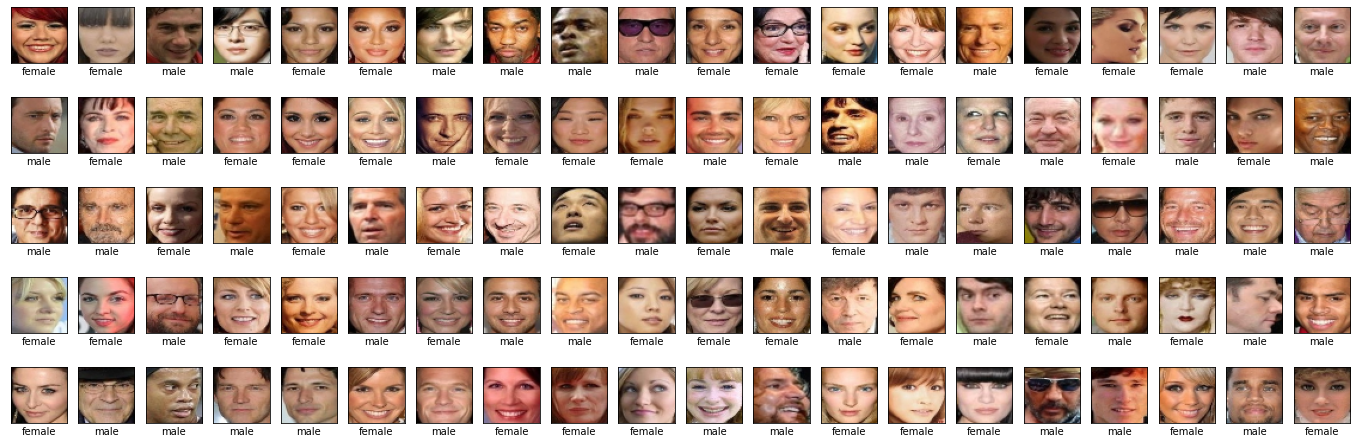

In [30]:
class_names= ['female', 'male']
plt.figure(figsize=(24,8))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(train_data[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel( class_names[train_label[i]])
plt.show()

In [31]:
model = models.Sequential()

model.add( layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=(48,48,3) ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.2) )

model.add( layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same' ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.3) )

model.add( layers.Conv2D(256, (3,3), kernel_initializer='he_uniform', padding='same' ))
model.add( layers.Activation('relu') )
model.add( layers.BatchNormalization()) 
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Dropout(0.4) )

model.add( layers.Flatten())
model.add( layers.Dense(64, kernel_initializer='he_uniform'))
model.add( layers.Activation('relu'))
model.add( layers.BatchNormalization()) 
model.add( layers.Dense(10))
model.add( layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 128)       0

In [32]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
h = model.fit(train_data, train_label, epochs=5,validation_split=0.2)

Epoch 1/5
1058/1058 [==============================] - 559s 528ms/step - loss: 1.5773 - accuracy: 0.8910 - val_loss: 1.5201 - val_accuracy: 0.9415
Epoch 2/5
1058/1058 [==============================] - 555s 525ms/step - loss: 1.5314 - accuracy: 0.9299 - val_loss: 1.5229 - val_accuracy: 0.9391
Epoch 3/5
1058/1058 [==============================] - 565s 534ms/step - loss: 1.5244 - accuracy: 0.9366 - val_loss: 1.5093 - val_accuracy: 0.9528
Epoch 4/5
1058/1058 [==============================] - 554s 523ms/step - loss: 1.5169 - accuracy: 0.9452 - val_loss: 1.5089 - val_accuracy: 0.9527
Epoch 5/5
1058/1058 [==============================] - 562s 531ms/step - loss: 1.5153 - accuracy: 0.9465 - val_loss: 1.5058 - val_accuracy: 0.9558


In [36]:
emotion_model = Sequential()

emotion_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=train_data[0].shape))
emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


emotion_model.add(Flatten())
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h1= emotion_model.fit(train_data, train_label, epochs=100,validation_split=0.2)

Epoch 1/100
1058/1058 [==============================] - 108s 102ms/step - loss: 1.3237 - accuracy: 0.8437 - val_loss: 1.2632 - val_accuracy: 0.9016
Epoch 2/100
1058/1058 [==============================] - 108s 102ms/step - loss: 1.2716 - accuracy: 0.8935 - val_loss: 1.2656 - val_accuracy: 0.9001
Epoch 3/100
1058/1058 [==============================] - 114s 108ms/step - loss: 1.2582 - accuracy: 0.9064 - val_loss: 1.2393 - val_accuracy: 0.9271
Epoch 4/100
1058/1058 [==============================] - 112s 106ms/step - loss: 1.2491 - accuracy: 0.9165 - val_loss: 1.2407 - val_accuracy: 0.9244
Epoch 5/100
1058/1058 [==============================] - 111s 105ms/step - loss: 1.2423 - accuracy: 0.9233 - val_loss: 1.2289 - val_accuracy: 0.9375
Epoch 6/100
1058/1058 [==============================] - 111s 105ms/step - loss: 1.2372 - accuracy: 0.9283 - val_loss: 1.2284 - val_accuracy: 0.9377
Epoch 7/100
1058/1058 [==============================] - 115s 108ms/step - loss: 1.2331 - accuracy: 0.9323

Epoch 56/100
1058/1058 [==============================] - 114s 108ms/step - loss: 1.2484 - accuracy: 0.9171 - val_loss: 1.2347 - val_accuracy: 0.9306
Epoch 57/100
1058/1058 [==============================] - 111s 105ms/step - loss: 1.2559 - accuracy: 0.9095 - val_loss: 1.2508 - val_accuracy: 0.9146
Epoch 58/100
1058/1058 [==============================] - 110s 104ms/step - loss: 1.2575 - accuracy: 0.9078 - val_loss: 1.2362 - val_accuracy: 0.9292
Epoch 59/100
1058/1058 [==============================] - 111s 105ms/step - loss: 1.6109 - accuracy: 0.5545 - val_loss: 1.6481 - val_accuracy: 0.5174
Epoch 60/100
1058/1058 [==============================] - 110s 104ms/step - loss: 1.2640 - accuracy: 0.9014 - val_loss: 1.2481 - val_accuracy: 0.9172
Epoch 61/100
1058/1058 [==============================] - 110s 104ms/step - loss: 1.2686 - accuracy: 0.8968 - val_loss: 1.2428 - val_accuracy: 0.9226
Epoch 62/100
1058/1058 [==============================] - 111s 105ms/step - loss: 1.2573 - accuracy:

In [40]:
e_model = Sequential()
name="Model2"

e_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=train_data[0].shape))
e_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
e_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
e_model.add(MaxPooling2D(pool_size=(2, 2)))
e_model.add(Dropout(0.25))


e_model.add(Flatten())
e_model.add(Dense(128, activation='relu'))
e_model.add(Dropout(0.5))
e_model.add(Dense(7, activation='softmax'))
tensorboard= TensorBoard(log_dir="logs\{}".format(name))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
e_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h2=e_model.fit(train_data, train_label, epochs=100,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/100
   1/1058 [..............................] - ETA: 1s - loss: 1.9456 - accuracy: 0.0938WARNING:tensorflow:From c:\users\tgop\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1058/1058 [==============================] - 109s 103ms/step - loss: 1.3856 - accuracy: 0.7794 - val_loss: 1.2741 - val_accuracy: 0.8905
Epoch 2/100
1058/1058 [==============================] - 108s 102ms/step - loss: 1.2643 - accuracy: 0.9009 - val_loss: 1.2525 - val_accuracy: 0.9126
Epoch 3/100
1058/1058 [==============================] - 109s 103ms/step - loss: 1.2494 - accuracy: 0.9161 - val_loss: 1.2372 - val_accuracy: 0.9291
Epoch 4/100
1058/1058 [==============================] - 112s 106ms/step - loss: 1.2427 - accuracy: 0.9224 - val_loss: 1.2265 - val_accuracy: 0.9391
Epoch 5/

1058/1058 [==============================] - 115s 109ms/step - loss: 1.2345 - accuracy: 0.9308 - val_loss: 1.2414 - val_accuracy: 0.9240
Epoch 54/100
1058/1058 [==============================] - 117s 111ms/step - loss: 1.2291 - accuracy: 0.9363 - val_loss: 1.2246 - val_accuracy: 0.9408
Epoch 55/100
1058/1058 [==============================] - 115s 109ms/step - loss: 1.2357 - accuracy: 0.9296 - val_loss: 1.2281 - val_accuracy: 0.9372
Epoch 56/100
1058/1058 [==============================] - 115s 109ms/step - loss: 1.2359 - accuracy: 0.9295 - val_loss: 1.2244 - val_accuracy: 0.9410
Epoch 57/100
1058/1058 [==============================] - 116s 110ms/step - loss: 1.2426 - accuracy: 0.9229 - val_loss: 1.2383 - val_accuracy: 0.9270
Epoch 58/100
1058/1058 [==============================] - 115s 109ms/step - loss: 1.2447 - accuracy: 0.9208 - val_loss: 1.2284 - val_accuracy: 0.9371
Epoch 59/100
1058/1058 [==============================] - 115s 109ms/step - loss: 1.2313 - accuracy: 0.9341 - val